In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [17]:
X,y = sklearn.datasets.make_moons(200, noise = 0.15)

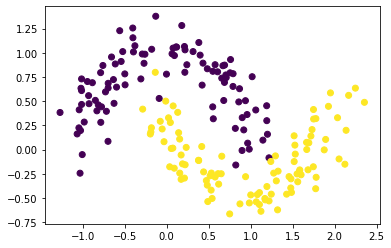

In [18]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [19]:
X.shape

(200, 2)

In [20]:
input_neurons = 2
output_neurons = 2 # 2 for binary cross entropy, 1 for cross entropy
samples = x.shape[0]
learning_rate = 0.001
lamda = 0.01

In [21]:
# key is input weight from first layer w1, value will be updated
model_dic = {'W1': W1, 'b1': b1, 'W2':W2, 'b2':b2}

NameError: name 'W1' is not defined

In [22]:
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, wW, b2

In [23]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(z2)
    # normalize
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True) 
    return z1, a1, softmax

In [24]:
# forward propagation
# calculate the difference between actural and predicted outputs, use cross entropy loss
def loss(softmax, y):
    W1, b1, W2, b2 = retreive(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m) # log_prob = -np.log(predicted)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss+= reg_loss
    return float(loss / y.shape[0])

In [25]:
# prediction
def predict(model_dict, x):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)   # (200,2)
    return np.argmax(softmax, axis = 1)    # (200,)